In [1]:
# Import important library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

### Read the input file and check the data dimension

In [2]:
# You can access from https://www.kaggle.com/uciml/german-credit
#Read input file and understand the data
# "default" is my dependent variable

In [3]:
credit_df = pd.read_csv('german_credit.csv', delimiter=',')

In [4]:
credit_df.head()

,default,account_check_status,duration_in_month,credit_history,purpose,credit_amount,savings,present_emp_since,installment_as_income_perc,personal_status_sex,...,present_res_since,property,age,other_installment_plans,housing,credits_this_bank,job,people_under_maintenance,telephone,foreign_worker
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In [5]:
credit_df.columns

Index(['default', 'account_check_status', 'duration_in_month',
       'credit_history', 'purpose', 'credit_amount', 'savings',
       'present_emp_since', 'installment_as_income_perc',
       'personal_status_sex', 'other_debtors', 'present_res_since', 'property',
       'age', 'other_installment_plans', 'housing', 'credits_this_bank', 'job',
       'people_under_maintenance', 'telephone', 'foreign_worker'],
      dtype='object')

### Q1 Randomly select 50% data for this use case( 1 Marks)
###### Hint: Use train_test_split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
test_size = 0.50 # taking 50:50 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code
X = credit_df.drop(columns=['default'])
y = credit_df[['default']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [8]:
X_train.shape

(500, 20)

In [9]:
# Lets build a Ensemble model but need to modify the dataset first


### Q2.Prepare the model data by converting non-numeric to dummy ( 1 Marks)
##### Hint: Use get_dummies

In [10]:
x = pd.get_dummies(X_train)

In [11]:
# Print Shape of model data

x.shape

(500, 61)

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 262 to 175
Data columns (total 61 columns):
duration_in_month                                                             500 non-null int64
credit_amount                                                                 500 non-null int64
installment_as_income_perc                                                    500 non-null int64
present_res_since                                                             500 non-null int64
age                                                                           500 non-null int64
credits_this_bank                                                             500 non-null int64
people_under_maintenance                                                      500 non-null int64
account_check_status_0 <= ... < 200 DM                                        500 non-null uint8
account_check_status_< 0 DM                                                   500 non-null uint8
account_check_status

### Check for highly correlated variables but don't required any treatment for this use case

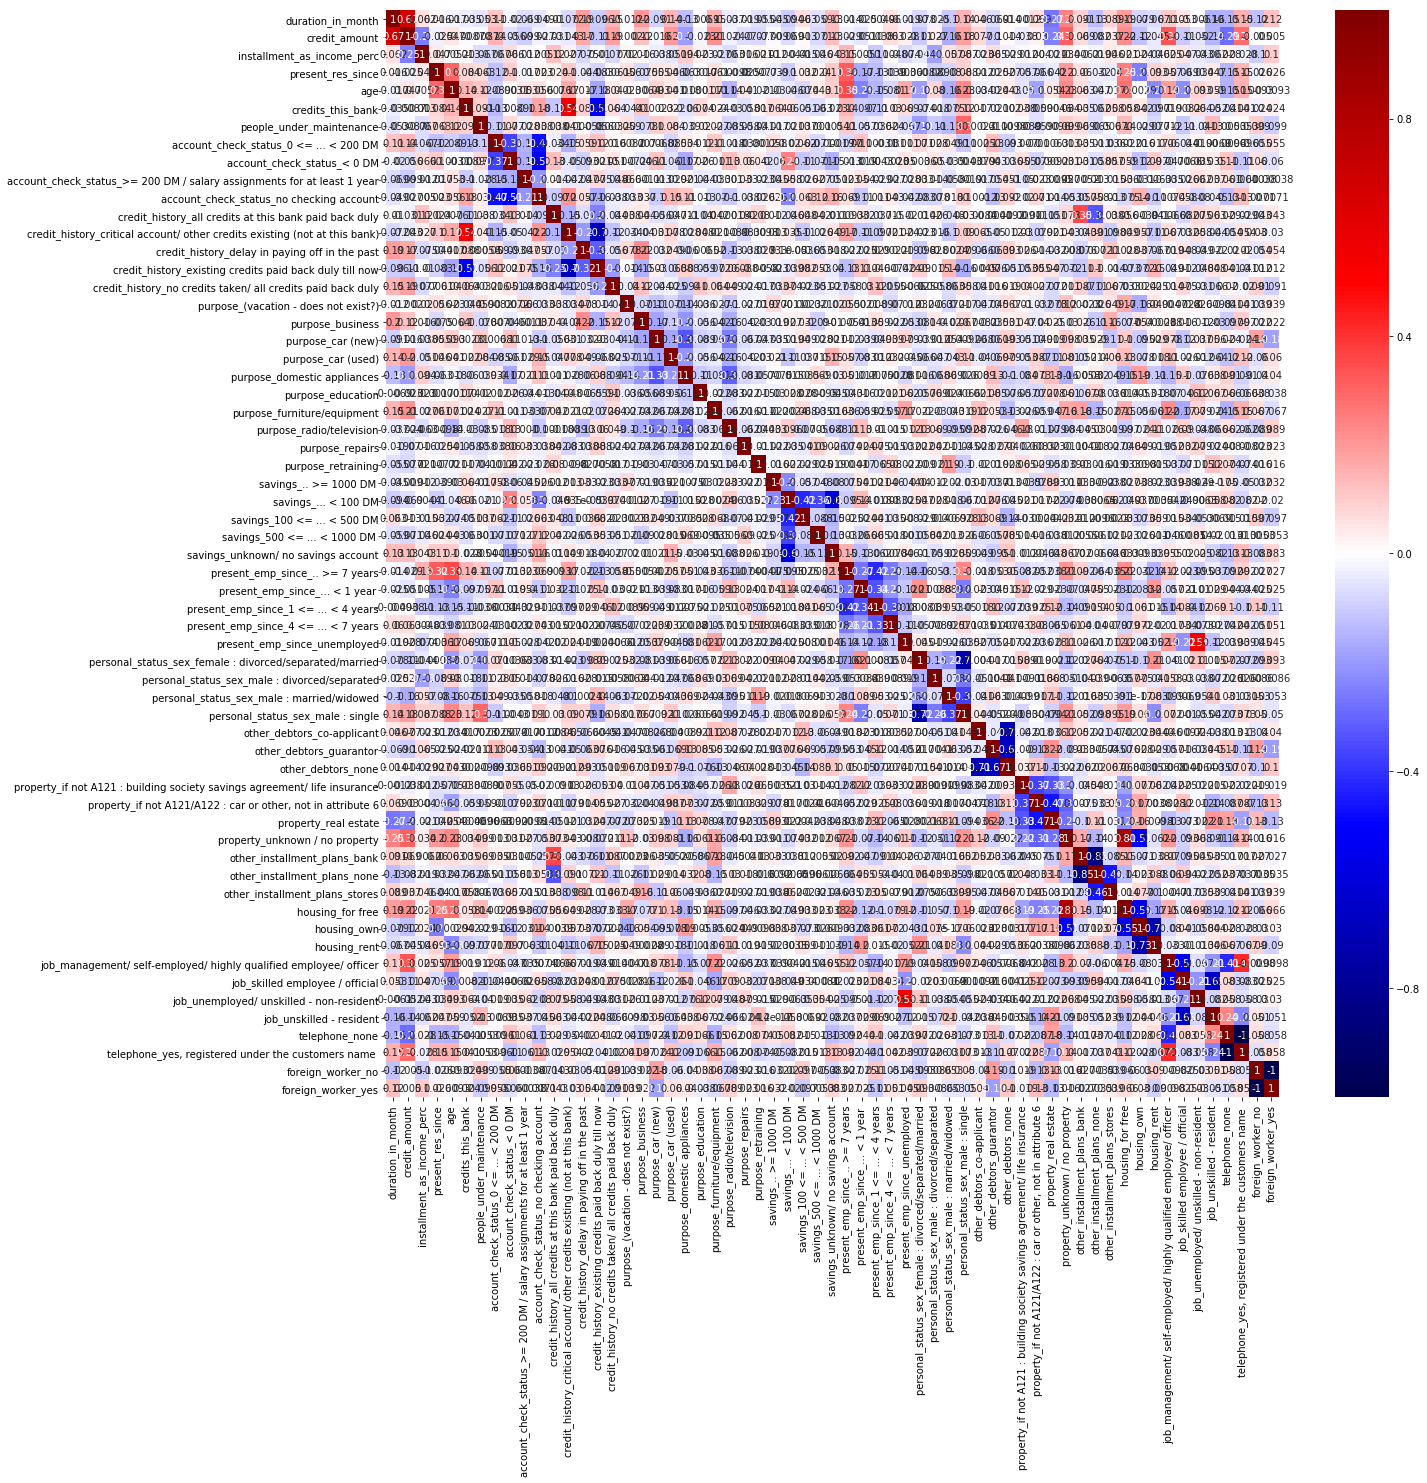

In [19]:
fig, ax1 = plt.subplots(figsize=(20,20))     
corr = x.corr()
sns.heatmap(corr, cmap='seismic', annot=True, vmax=1, vmin=-1, ax=ax1)

In [20]:
# High correlation is seen between the duration in months and credit amount, but other highly correleted attributes are only 
# converted dummies, which is obvious.

### Drop the original variables which are converted to dummy

In [21]:
# Already dropped the original variables

In [23]:
x.shape

(500, 61)

In [26]:
y_train.shape

(500, 1)

### Q3 Split Train/Test data 70:30 ratio( 1 Marks)
##### Hint:from sklearn.model_selection import train_test_split

In [27]:
test_size = 0.30 # taking 70:30 training and test set
seed = 7  # Random numbmer seeding for reapeatability of the code

X2_train, X2_test, y2_train, y2_test = train_test_split(x, y_train, test_size=test_size, random_state=seed)

### Q4 Build Random Forest Model( 1 Marks)
#### Hint:from sklearn.ensemble import RandomForestClassifier using n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999

In [28]:
from sklearn.ensemble import RandomForestClassifier

In [29]:
model1 = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [30]:
model1.fit(X2_train, y2_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=2,
            oob_score=False, random_state=9999, verbose=0,
            warm_start=False)

array([[94,  9],
       [34, 13]], dtype=int64)

### Q5 Calculate Confusion Matrix and Accuracy score (1 Marks)
##### Hint: Use confusion_matrix and accuracy_score

In [37]:
# calculate accuracy measures and confusion matrix
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, precision_score, auc

In [38]:
y_predict = model1.predict(X2_test)

In [40]:
metrics.confusion_matrix(y2_test, y_predict)

array([[94,  9],
       [34, 13]], dtype=int64)

Analyzing the confusion matrix
True Positives (TP): we correctly predicted that they do not default 94

True Negatives (TN): we correctly predicted that they default 13

False Positives (FP): we incorrectly predicted that they do not default (a "Type I error") 34 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they do deafult (a "Type II error") 9 Falsely predict negative Type II error

In [42]:
# Accuracy Score
model1.score(X2_test, y2_test)

0.7133333333333334

### Q6 Show the list of the features importance( 1 Marks)

In [51]:
feat_imp = pd.DataFrame()
feat_imp['feature'] = X2_train.columns
feat_imp['importance'] = model1.feature_importances_

In [52]:
feat_imp

,feature,importance
0,duration_in_month,0.081161
1,credit_amount,0.107723
2,installment_as_income_perc,0.035251
3,present_res_since,0.033504
4,age,0.078565
5,credits_this_bank,0.017733
6,people_under_maintenance,0.013143
7,account_check_status_0 <= ... < 200 DM,0.016621
8,account_check_status_< 0 DM,0.026024
9,account_check_status_>= 200 DM / salary assign...,0.008370


### Q7 K-fold cross-validation( 2 Marks)
##### k-fold cross validation( without stratification)
##### Usually k is set as 10-20 in practical settings, depends on data set size

In [195]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [196]:
# Use below values
num_folds = 10
seed = 77

In [197]:
model = RandomForestClassifier(n_jobs=2,n_estimators=500,criterion="entropy",random_state=9999)

In [198]:
#Validate the Random Forest model build above using k fold

In [199]:
kfold = KFold(n_splits=num_folds, shuffle=True, random_state=seed)

In [200]:
result = cross_val_score(model, x, y_train, cv=kfold)

In [0]:
#Calculate Mean score

In [201]:
result.mean()

0.728

In [0]:
# Calculate score standard deviation using std()

In [202]:
result.std()

0.04664761515876242

# Q8 Print the confusion matrix( 1 Marks)

In [203]:
from sklearn.model_selection import cross_validate


In [204]:
from  sklearn.metrics import accuracy_score, roc_auc_score, average_precision_score, precision_score, recall_score

In [205]:
# Considering default variable has 2 classes
# 0 means not default , considering this as positive case
# 1 means default , Considering this as negative case
from sklearn.metrics import roc_curve, auc


def tn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 1]
def fp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[1, 0]
def fn(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 1]
def tp(y_true, y_pred): return confusion_matrix(y_true, y_pred)[0, 0]
def accuracy(y_true, y_pred): return accuracy_score(y_true, y_pred)
def avgprecision_score(y_true, y_pred): return average_precision_score(y_true, y_pred)
def prec_score(y_true, y_pred): return precision_score(y_true, y_pred)
def recallscore(y_true, y_pred): return recall_score(y_true, y_pred)
def rocaucscore(y_true, y_pred): return roc_auc_score(y_true, y_pred)
def fpr(y_true, y_pred):
    fpr, tpr, thresholds = roc_curve(y_test, y_pred)
    return fpr

In [206]:
x.shape

(500, 61)

In [207]:
y_train.shape

(500, 1)

In [208]:
from sklearn.metrics import make_scorer
scorings = {'tp': make_scorer(tp), 'tn': make_scorer(tn), 'fp': make_scorer(fp), 'fn': make_scorer(fn), 
           'accuracy' : make_scorer(accuracy), 'avgprecision_score' : make_scorer(avgprecision_score),
           'prec_score' : make_scorer(prec_score), 'recallscore':make_scorer(recallscore), 'rocaucscore':make_scorer(rocaucscore)
           }

In [126]:
# Scoring can be defined as below for classification problems
#‘accuracy’	sklearn.metrics.accuracy_score
#‘average_precision’	sklearn.metrics.average_precision_score
#‘f1’	sklearn.metrics.f1_score
#‘precision’	sklearn.metrics.precision_score
#‘recall’	sklearn.metrics.recall_score
#‘roc_auc’	sklearn.metrics.roc_auc_score

In [209]:
cv_results = cross_validate(model.fit(x, y_train), x, y_train, scoring=scorings, cv=kfold)

In [210]:
cv_results

{'fit_time': array([2.35330796, 2.32240462, 2.02703404, 2.05537271, 2.08253741,
        2.0323956 , 2.05244756, 2.08313251, 2.06505632, 2.0487833 ]),
 'score_time': array([1.2299788 , 1.02815461, 1.04266   , 1.0513885 , 1.03451014,
        1.02685022, 1.03571773, 1.03808331, 1.04186821, 1.03888893]),
 'test_tp': array([33, 32, 32, 36, 30, 29, 32, 29, 29, 27]),
 'train_tp': array([308, 308, 310, 306, 308, 312, 304, 309, 310, 312]),
 'test_tn': array([ 4,  5,  3,  4,  5,  7,  5,  8, 10,  4]),
 'train_tn': array([142, 142, 140, 144, 142, 138, 146, 141, 140, 138]),
 'test_fp': array([11, 10, 14,  9, 10, 12,  6,  8,  7, 15]),
 'train_fp': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'test_fn': array([2, 3, 1, 1, 5, 2, 7, 5, 4, 4]),
 'train_fn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'test_accuracy': array([0.74, 0.74, 0.7 , 0.8 , 0.7 , 0.72, 0.74, 0.74, 0.78, 0.62]),
 'train_accuracy': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'test_avgprecision_score': array([0.39777778, 0.40833333, 0.

In [211]:
# Getting the test set true positive scores
print(cv_results['test_tp'])  

# Getting the test set false negative scores
print(cv_results['test_fn'])

# Getting the test set true negative scores
print(cv_results['test_tn'])

# Getting the test set false positive scores
print(cv_results['test_fp'])  


[33 32 32 36 30 29 32 29 29 27]
[2 3 1 1 5 2 7 5 4 4]
[ 4  5  3  4  5  7  5  8 10  4]
[11 10 14  9 10 12  6  8  7 15]


# Q9.Classification accuracy: 
percentage of correct predictions and Calculate sensitivity (or True Positive Rate or Recall) and Precision.
( 1 Marks)

In [215]:
# Printing the scores/percentages for each fold

In [108]:
# as above tp is taken as the person is not default and predicted as not default
# tn is taken as the person predicted as default and person is default

# So below we calculated the tpr and precision based on that for all the 10 kFolds

In [212]:
print(cv_results['test_recallscore']*100)  

[26.66666667 33.33333333 17.64705882 30.76923077 33.33333333 36.84210526
 45.45454545 50.         58.82352941 21.05263158]


In [213]:
print(cv_results['test_prec_score']*100)

[66.66666667 62.5        75.         80.         50.         77.77777778
 41.66666667 61.53846154 71.42857143 50.        ]


In [ ]:
# Accuracy

In [214]:
print(cv_results['test_accuracy'])

[0.74 0.74 0.7  0.8  0.7  0.72 0.74 0.74 0.78 0.62]


# Q10.Plot Receiver Operating Characteristic (ROC) Curves( 1 Marks)

In [216]:
# Plot the ROC for each kFold, i needed to run the cross validation in loop
# If this question has been on 4 questions earlier, i would have run the model only once for all k-folds. and could be 
# could be in position to provide sub sequent answers.

In [193]:
from scipy import interp

In [185]:
X = x.copy()
y1 = y_train.copy()

In [186]:
X.reset_index(inplace=True)

In [187]:
y1.reset_index(inplace=True)

In [188]:
X.drop(columns=['index'], inplace=True)

In [189]:
y1.drop(columns=['index'], inplace=True)

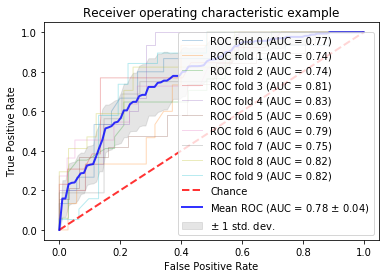

In [194]:
tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

i = 0
for train, test in kfold.split(X, y1):
    probas_ = model.fit(X.loc[train], y1.loc[train]).predict_proba(X.loc[test])
    # Compute ROC curve and area the curve
    fpr, tpr, thresholds = roc_curve(y1.loc[test], probas_[:, 1])
    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0
    roc_auc = auc(fpr, tpr)
    aucs.append(roc_auc)
    plt.plot(fpr, tpr, lw=1, alpha=0.3,
             label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))

    i += 1
plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
         label='Chance', alpha=.8)

mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)
plt.plot(mean_fpr, mean_tpr, color='b',
         label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),
         lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,
                 label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

ROC curve can help you to choose a threshold that balances sensitivity and specificity in a way that makes sense for your particular context

# Q11. Calculate AUC(the percentage of the ROC plot that is underneath the curve) - optional

### Bootstrapping ( Bonus)
##### Given a dataset of size n, a bootstrap sample is created by sampling n instances uniformly from the data (with/without replacement)
##### Create a model with each bootstrap sample and validate it with the test set
##### Final result is calculated by averaging the accuracy of models

In [0]:
# Number of iterations for bootstrapping
bootstrap_iteration = 10
accuracy = []

In [0]:
from sklearn.utils import resample
from sklearn.metrics import accuracy_score

for i in range(bootstrap_iteration):
    X_, y_ = resample(X_train, y_train)
    rfm.fit(X_, y_)
    y_pred = rfm.predict(X_test)
    
    acc = accuracy_score(y_pred, y_test)
    accuracy.append(acc)

In [0]:
accuracy = np.array(accuracy)
print('Accuracy Score')
print('Avearge: ', accuracy.mean())
print('Standard deviation: ', accuracy.std())

Accuracy Score
Avearge:  0.6893333333333334
Standard deviation:  0.014966629547095768
